# Phishing Websites Perceptron Classifier

This project for DSCI 6672 (A.I. & Cybersecurity) will use a database of common 'Phishing' features to build a machine learning classifier that can identify whether a website is malicous or safe.

# Initial Perceptron

In [0]:
# Begin by importing needed libraries / packages.
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset and add feature labels for easier identification.
df = pd.read_csv('phishing_dataset.csv', names=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'phish'])
# Set dataframe parameters to be modeled.
X = df.drop(['phish'], axis = 1).values
y = df['phish'].values

In [0]:
# Split the data into train and test groups.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=0)

In [99]:
# Initiate model and fit to data.
from sklearn.linear_model import Perceptron
p = Perceptron(max_iter=40, eta0=0.1, random_state=0)
p.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# Use trained model to generate predictions on test data. 
y_pred = p.predict(X_test)

In [101]:
# Review model accuracy.
from sklearn.metrics import accuracy_score
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 273
Accuracy: 0.88


After an initial run, our model is 88% accurate in classifying phishing websites. 88% isn't bad for a start, but can the accuracy be improved upon? With 30 features our dataset may be too complex for our perceptron model to accurately fit. One possible solution is simplifying the model through feature elimination.



# Correlation and Feature Reduction

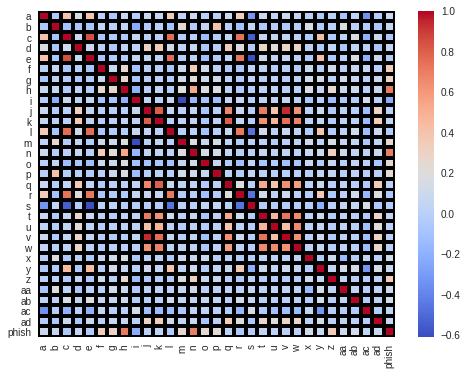

In [102]:
# Display heat map of feature correlation to identify features eligible for RFE (Recursive Feature Elimination).
heat_map = df
plt.figure(figsize=(8, 6))
sns.heatmap(heat_map.corr(), cmap='coolwarm', linewidths=3, linecolor='black')

Judging by our heat map we may have room to play around with the features. We have several options here. We could remove features that have a low correlation to the target parameter, or we could remove features that are highly correlated to other features as they provide the same information. Before we start removing information from our dataset, lets explore the features a little more.

In [103]:
# Print a correlation table.
print(df.corr())

              a         b         c  ...        ac        ad     phish
a      1.000000 -0.052411  0.403461  ... -0.339065 -0.019103  0.094160
b     -0.052411  1.000000 -0.097881  ... -0.022987 -0.067153  0.057430
c      0.403461 -0.097881  1.000000  ... -0.198410  0.085461 -0.067966
d      0.158699 -0.075108  0.104447  ... -0.006080 -0.080357  0.052948
e      0.397389 -0.081247  0.842796  ... -0.194165  0.070390 -0.038608
f     -0.005257  0.055247 -0.080471  ...  0.067423 -0.002763  0.348606
g     -0.080745  0.003997 -0.041916  ... -0.010526  0.081627  0.298323
h      0.071414  0.048754 -0.061426  ... -0.011710  0.063411  0.714741
i     -0.022739 -0.221892  0.060923  ...  0.122672 -0.002212 -0.225789
j      0.087025 -0.042497  0.006101  ... -0.127243  0.300917 -0.000280
k      0.060979  0.000323  0.002201  ... -0.139104  0.343987  0.036419
l      0.363534 -0.089383  0.757838  ... -0.128724  0.096187 -0.039854
m      0.029773  0.246348 -0.037235  ... -0.067109  0.035412  0.253372
n     

Many features have a correlation of less than +- 0.05 to the target parameter. Let's see what happens when we lose some of the features.

In [0]:
# Create a new dataframe for experimentation with features. Set model parameters.
df2 = df.copy()
X = df2.drop(['phish'], axis = 1).values
y = df2['phish'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=0)

For illustative purposes we will reduce our model from 30 features, down to around 20 or so and evaluate any performance change. We can use RFE to help indicate the optimum number of features as well as features best suited for removal.

In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=p, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=Perceptron(alpha=0.0001, class_weight=None,
                           early_stopping=False, eta0=0.1, fit_intercept=True,
                           max_iter=40, n_iter_no_change=5, n_jobs=None,
                           penalty=None, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [107]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 30


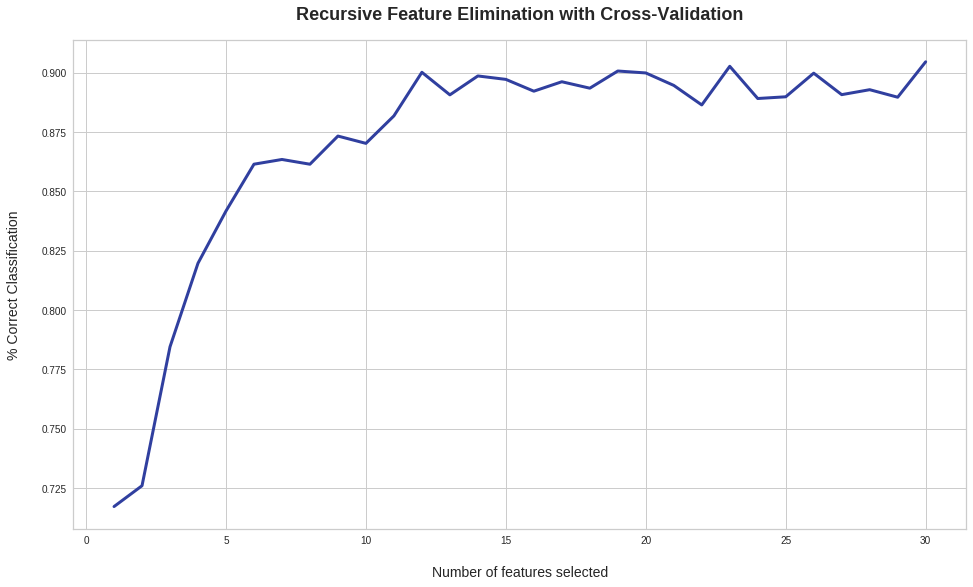

In [70]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

Well this is interesting. It seems the best number of features is....all of them. For the sake of illustration though, lets assume that a higher accuracy comes from having less features. Twenty-three  features seems to have the next highest accuracy rating, so let's continue with that.

# RFE Model

In [108]:
# Import RFE for feature reduction.
from sklearn.feature_selection import RFE
p = Perceptron(max_iter=100, eta0=0.01, random_state=0)
# Reduce features from 30 to 23.
rfe = RFE(p,23)                              
rfe = rfe.fit(X_train, y_train)               
pred = rfe.predict(X_test)
# Test accuracy on reduced model.
print("Accuracy of reduced dataset:", accuracy_score(y_test,pred))

Accuracy of reduced dataset: 0.9077340569877883


We can see an increase in accuracy (albiet small) over our initial model. If we in fact could have achieved a higher accuracy by reducing the number of features, RFE would have illustrated this in the above chart. We can also see by the RFE chart above the highest accuracy rating was not only with 30 features, but was also higher than our initial model. This indicates that adjusting the learning rate of our initial model could also help to improve accuracy.

We can experiment with the number of features and learning rates to evaluate our model and determine if there is room for improvement. Lets knock off a couple more features and increase the learning rate to see what happens.

In [94]:
# Adjusted learning rate to experiment with accuracy.
p = Perceptron(max_iter=100, eta0=0.22, random_state=0)
# Reduce features from 30 to 20.
rfe = RFE(p,20)                              
rfe = rfe.fit(X_train, y_train)               
pred = rfe.predict(X_test)
# Test accuracy on reduced model.
print("Accuracy of reduced dataset:", accuracy_score(y_test,pred))

Accuracy of reduced dataset: 0.9140660334690185


The accuracy of our model increased by more than three percent over our initial model by dropping some features and adjusting the learning rate. 91% accuracy isn't too shabby for a single perceptron model.

# Additional Models

Now that we've seen the performance of a perceptron model, perhaps there are other models that might be a better fit for the data. Lets explore if a different model can give us better results. First, we'll try a random forest classifier.

In [0]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [117]:
rfe = RFE(rfc,20)                              
rfe = rfe.fit(X_train, y_train)               
pred = rfe.predict(X_test)

print("Accuracy of reduced dataset with RFC:", accuracy_score(y_test,pred))

Accuracy of reduced dataset with RFC: 0.966078697421981


Our random forest classifier seems to do better with 96% accuracy. What about logistic regression?

In [0]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
rfe = RFE(logreg,23)                              
rfe = rfe.fit(X_train, y_train)               
pred = rfe.predict(X_test)

print("Accuracy of reduced dataset with Logistic Regression:", accuracy_score(y_test,pred))

Accuracy of reduced dataset with Logistic Regression: 0.9172320217096337


Logistic regression performs fairly well on our data, but not significantly better than our perceptron model. For our final model, lets see what those perceptrons can do when they work together in a multi-layer perceptron classifier.

In [0]:
# Import MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print('Training Data Confusion Matrix:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

Training Data Confusion Matrix:
[[3797   87]
 [  13 4947]]
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99      3884
           1       0.98      1.00      0.99      4960

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844



In [26]:
print('Testing Data Confusion Matrix:')
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

Testing Data Confusion Matrix:
[[ 949   65]
 [  13 1184]]
              precision    recall  f1-score   support

          -1       0.99      0.94      0.96      1014
           1       0.95      0.99      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.96      0.96      2211



A multi-layer perceptron classifier has the best performance of the bunch,   with 97% accuracy on the test data.